In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# import data and get a first overview
df = pd.read_csv('amazon.csv', encoding='ANSI')
print(df.describe())
df.head()

              year       number
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [79]:
# for translation from month name to month value (as dates are mislabeled to always show January)
# as well as from portuguese to englisch
month_number_dic = {'Janeiro':1, 'Fevereiro':2, 'Março':3, 'Abril':4, 'Maio':5, 'Junho':6,
                    'Julho':7, 'Agosto':8, 'Setembro':9, 'Outubro':10, 'Novembro':11, 'Dezembro':12}
month_translate_dic = {'Janeiro':'Jan', 'Fevereiro':'Feb', 'Março':'Mar', 'Abril':'Apr', 'Maio':'May', 'Junho':'Jun',
                    'Julho':'Jul', 'Agosto':'Aug', 'Setembro':'Sep', 'Outubro':'Oct', 'Novembro':'Nov', 'Dezembro':'Dec'}


# data cleansing
df_clean = df.copy()
df_clean['month_number'] = df_clean.month.apply(lambda x: month_number_dic[x]) # new column with month value
df_clean['month'] = df_clean.month.apply(lambda x: month_translate_dic[x]) # translate
df_clean['number'] = df_clean['number'].astype(int)
df_clean.drop(labels='date', axis=1, inplace=True)

print(df_clean['state'].unique())
print(df_clean.shape)
df_clean.head()

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
(6454, 5)


,year,state,month,number,month_number
0,1998,Acre,Jan,0,1
1,1999,Acre,Jan,0,1
2,2000,Acre,Jan,0,1
3,2001,Acre,Jan,0,1
4,2002,Acre,Jan,0,1


In [90]:
# create grouped data frame with mean and total per month

df_temp = df_clean.copy()
df_temp = df_temp.groupby(['year', 'month']).sum()
df_temp.reset_index(inplace=True)
df_temp = df_temp.groupby('month').mean()
df_temp.reset_index(inplace=True)
df_temp.drop(labels=['year','month_number'], axis=1, inplace=True)
df_temp = df_temp.round(decimals=0)
df_temp['number'] = df_temp['number'].apply(int)
df_temp.rename(columns={'number':'number_mean'}, inplace=True)

df_grouped_month = df_clean.copy()
df_grouped_month = df_grouped_month.groupby('month').sum()
df_grouped_month.drop(labels=['year','month_number'], axis=1, inplace=True)
df_grouped_month.reset_index(inplace=True)
df_grouped_month.sort_values(by=['number'], ascending=False, inplace=True)

df_grouped_month = df_grouped_month.merge(df_temp,how='left')
df_grouped_month.columns = ['Month', 'Total Number of Fires', 'Average Number of Fires']
df_grouped_month.head(12)

,Month,Total Number of Fires,Average Number of Fires
0,Jul,92302,4615
1,Oct,88600,4430
2,Aug,87970,4398
3,Nov,85471,4274
4,Sep,58464,2923
5,Dec,57513,3027
6,Jun,56003,2800
7,Jan,47746,2387
8,May,34729,1736
9,Feb,30848,1542


In [101]:
# new df grouped by year
df_grouped_year = df_clean.copy()
df_grouped_year = df_grouped_year.groupby('year').sum()
df_grouped_year.drop(labels='month_number', axis=1, inplace=True)

# get total number of fires
print(df_grouped_year['number'].sum())
df_grouped_year.reset_index(inplace=True)
df_grouped_year['year'] = df_grouped_year.year.astype(int)

698551


In [102]:
# calculate correlation
Pearson_coef,p_value = stats.pearsonr(df_grouped_year['year'], df_grouped_year['number'])
print(f"Pearson's r: {Pearson_coef}\np value: {p_value}")

Pearson's r: 0.6557453397608708
p value: 0.0016944101124347843


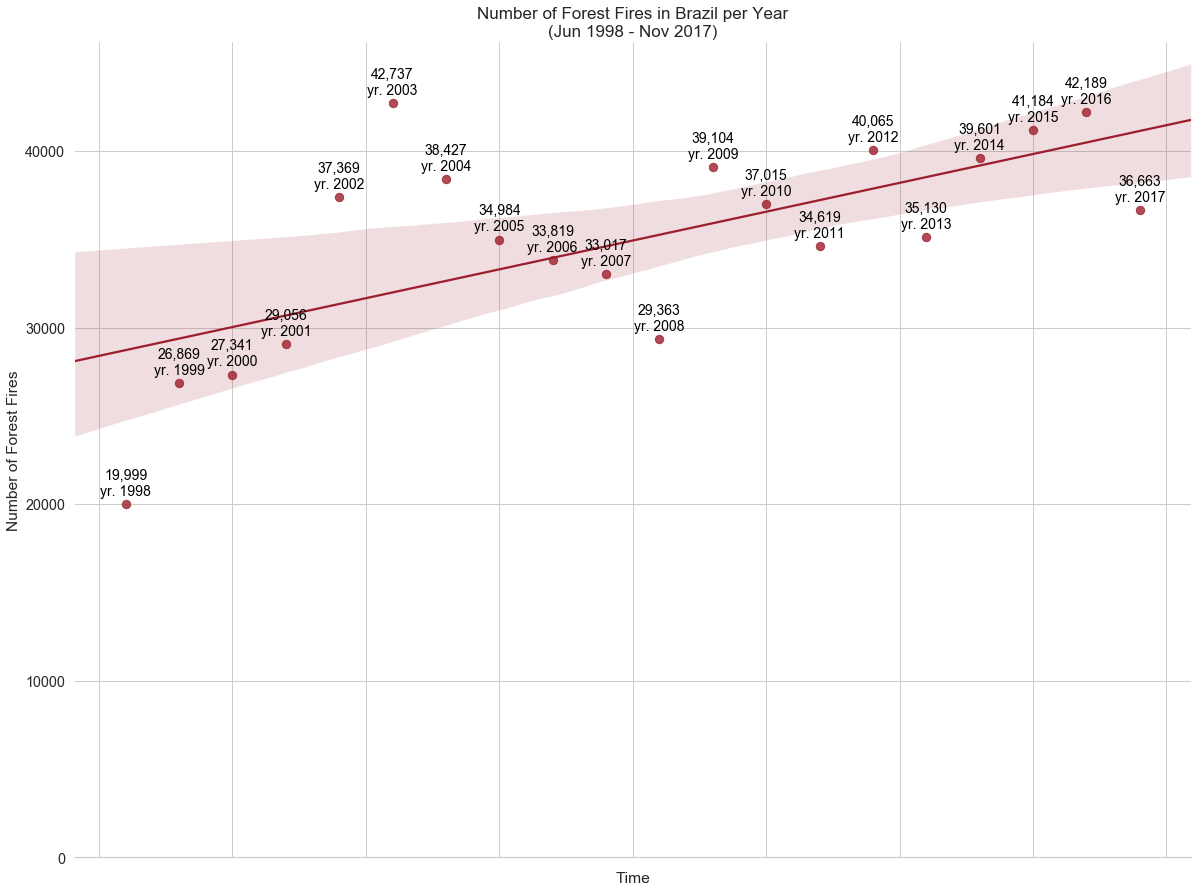

In [123]:
# plot number of fires over years

# set style
sns.set(font_scale=1.3)
sns.set_style('whitegrid')

# draw regression plot
fig, ax = plt.subplots(figsize = (20, 15))
sns.regplot(x='year', y='number', data=df_grouped_year, marker='o', color='#9c1f2d', scatter_kws={'s':70}) # order ?

ax.set_title('Number of Forest Fires in Brazil per Year\n(Jun 1998 - Nov 2017)', fontsize=17)
ax.set_xlabel('Time')
ax.set_ylabel('Number of Forest Fires')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticklabels('' * 9)
ax.set_ylim(bottom=0)

for line in range(0,df_grouped_year.shape[0]):
     ax.text(df_grouped_year.year[line], df_grouped_year.number[line]+500,
             str(df_grouped_year.number[line])[:2] + ',' + str(df_grouped_year.number[line])[2:] + '\nyr. '
             + str(df_grouped_year.year[line]),
             horizontalalignment='center', color='black', fontsize=14)

plt.savefig('forest_fires_regression_y.png', dpi=300)

In [92]:
# create new df grouped by date for analysis
df_grouped_date = df_clean.copy()

df_grouped_date['date'] = pd.to_datetime(df_grouped_date['year'].astype(str)
                                          + df_grouped_date['month_number'].astype(str),
                                          format='%Y%m')

df_reg = df_grouped_date.copy()
df_reg = df_reg.groupby('date').sum()
df_reg.reset_index(inplace=True)
# translate date to ordinal for regression
df_reg['date_ordinal'] = pd.to_datetime(df_reg['date']).apply(lambda date: date.toordinal())

print(df_reg.describe())

               year       number  month_number   date_ordinal
count    239.000000   239.000000    239.000000     239.000000
mean   54209.866109  2922.807531    174.882845  733011.238494
std      213.432036  1535.690356     93.091189    2104.401308
min    53946.000000     0.000000     27.000000  729390.000000
25%    54067.500000  1726.500000     94.500000  731200.500000
50%    54189.000000  2830.000000    162.000000  733011.000000
75%    54324.000000  3894.500000    243.000000  734823.000000
max    56476.000000  7336.000000    324.000000  736634.000000


Pearson's r: 0.24686206249656623
p value: 0.00011514545588220165


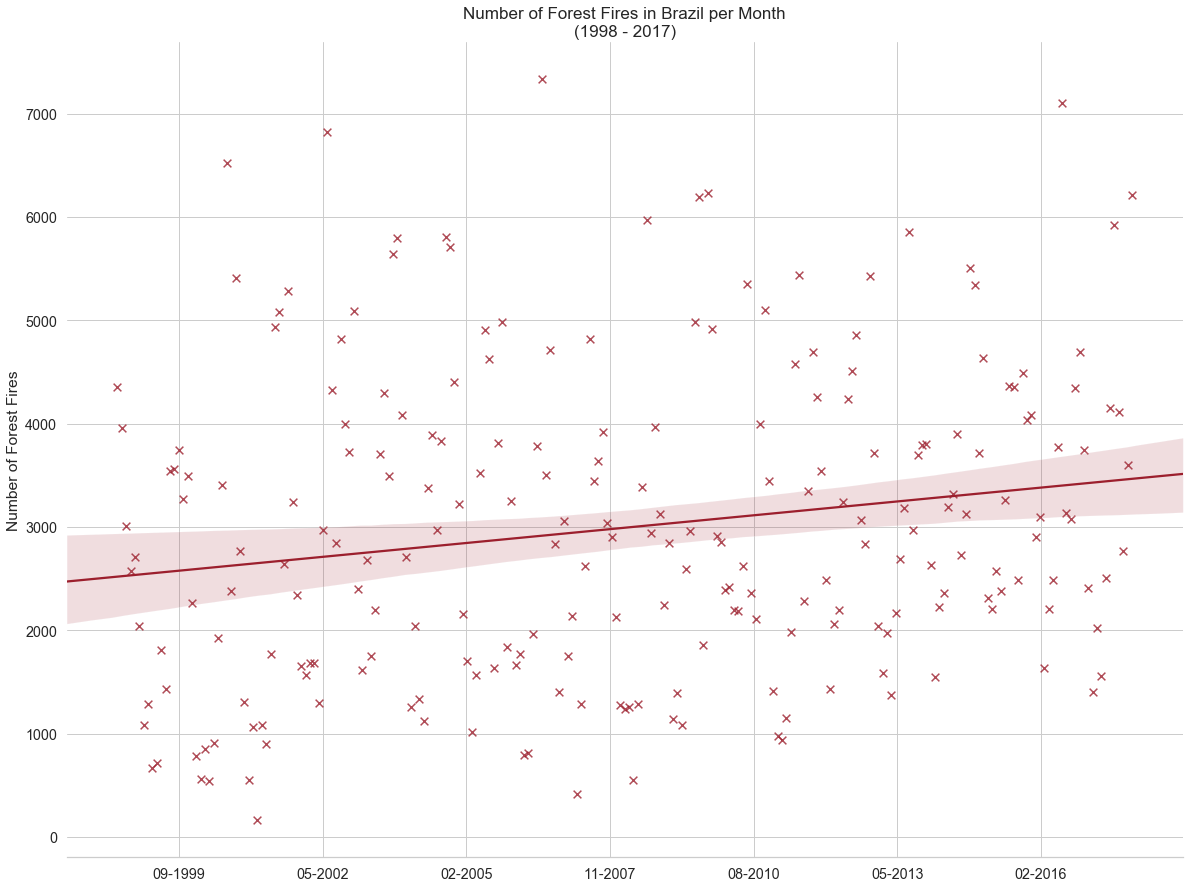

In [99]:
# linear univariat regression of number of fires compared to date

# calculate correlation
Pearson_coef,p_value = stats.pearsonr(df_reg['date_ordinal'], df_reg['number'])
print(f"Pearson's r: {Pearson_coef}\np value: {p_value}")

# set style
sns.set(font_scale=1.3)
sns.set_style('whitegrid')

# draw regression plot
fig, ax = plt.subplots(figsize = (20, 15))
sns.regplot(x='date_ordinal', y='number', data=df_reg[6:], marker='x', color='#9c1f2d', scatter_kws={'s':60})

ax.set_title('Number of Forest Fires in Brazil per Month\n(1998 - 2017)', fontsize=17)
ax.set_xlabel('')
ax.set_ylabel('Number of Forest Fires')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# to correctly show x ticks as date values and not ordinals
from datetime import datetime
ord_ticks = [729000,730000, 731000, 732000, 733000, 734000, 735000, 736000]
nom_ticks = []
for tick in ord_ticks:
    nom_ticks.append(str(datetime.fromordinal(tick))[5:7] + '-' + str(datetime.fromordinal(tick))[:4])
ax.set_xticklabels(nom_ticks)

plt.savefig('forest_fires_regression.png', dpi=300)

In [9]:
# create df for pivot tabel and heatmap
df_pivot = df_grouped_date.copy()

# change date to show year-month
df_pivot.date = pd.to_datetime(df_pivot.date).dt.to_period('m')

#group by date (year, month)
df_pivot = df_pivot.groupby('date').sum()
df_pivot.reset_index(inplace=True)

# add year and month column
df_pivot['year'] = [str(d).split('-')[0] for d in df_pivot.date]
df_pivot['month_number'] = [str(d).split('-')[1] for d in df_pivot.date]
df_pivot['month_number'] = df_pivot['month_number'].astype(int)
df_pivot = df_pivot.iloc[5:]

# create pivot
df_pivot = pd.pivot_table(df_pivot, index='year', columns='month_number', values='number')
df_pivot = df_pivot.round(decimals=0)
df_pivot

month_number,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1998,NaN,NaN,NaN,NaN,NaN,1352.0,4357.0,3962.0,3007.0,2569.0,2709.0,2043.0
1999,1081.0,1284.0,667.0,717.0,1812.0,1433.0,3537.0,3561.0,3749.0,3267.0,3494.0,2267.0
2000,778.0,561.0,848.0,537.0,904.0,1921.0,3402.0,6523.0,2377.0,5411.0,2771.0,1308.0
2001,547.0,1059.0,161.0,1081.0,898.0,1774.0,4936.0,5079.0,2644.0,5287.0,3246.0,2344.0
2002,1654.0,1570.0,1679.0,1682.0,1292.0,2968.0,6825.0,4323.0,2841.0,4818.0,3993.0,3724.0
2003,5091.0,2398.0,1619.0,2677.0,1747.0,2197.0,3702.0,4296.0,3497.0,5639.0,5792.0,4082.0
2004,2705.0,1255.0,2040.0,1335.0,1124.0,3380.0,3886.0,2968.0,3829.0,5802.0,5705.0,4398.0
2005,3223.0,2153.0,1706.0,1011.0,1570.0,3519.0,4903.0,4622.0,1636.0,3816.0,4983.0,1842.0
2006,3255.0,1666.0,1774.0,792.0,808.0,1968.0,3782.0,7336.0,3500.0,4708.0,2830.0,1400.0


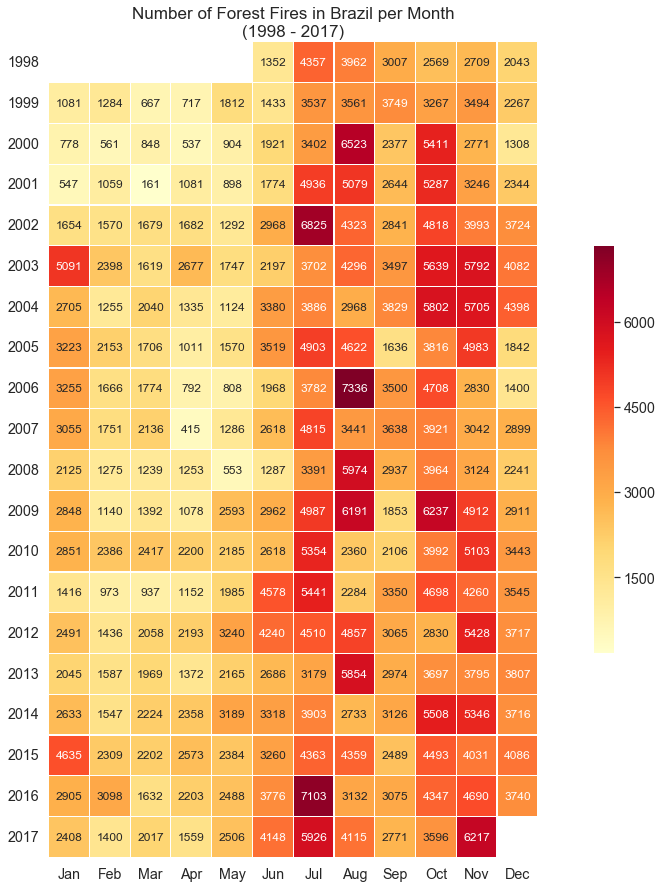

In [13]:
# draw heatmap
fig, ax = plt.subplots(figsize = (20, 15))

sns.heatmap(df_pivot, linewidth=0.2, linecolor='white', cmap='YlOrRd', annot=True,
            fmt='g', annot_kws={"size": 12}, cbar_kws={"shrink": 0.5}, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_title('Number of Forest Fires in Brazil per Month\n(1998 - 2017)', fontsize=17)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(month_translate_dic.values())
ax.set_yticklabels(np.arange(1998,2018,1), rotation=0, va="center")

plt.savefig('forest_fires_heatmap.png', dpi=300)